# Task05分享 - 样式色彩秀芳华

学习内容：https://github.com/datawhalechina/fantastic-matplotlib

本节分为样式管理和色彩管理两部分。



In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 样式管理

前面我们学习了通过`**kwargs`为每个绘图单独添加样式的方法。在matplotlib中还可以设定全局样式，形成风格统一的样式模板，应用于所有绘图。

我们平时使用的样式模板是默认样式，它是如此之有用。你会发现几乎所有的论文都是基于默认样式。

`plt.style.use('default')`

matplotlib内置了多种样式，可以使用下面的语句查看所有可用的样式。

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


`plt.style.use()`用于设定全局样式，它可以是一个对应内置样式的`str`类型，也可以是样式文件的路径。

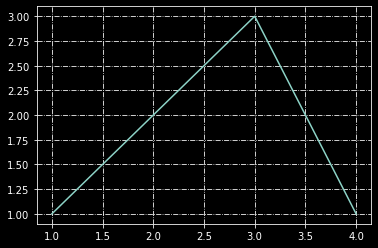

In [3]:
plt.style.use('dark_background')
plt.grid(True, linestyle='-.')
plt.plot([1, 2, 3, 4], [1, 2, 3, 1])

下面还原默认样式，我们将介绍在其基础上微调的做法。

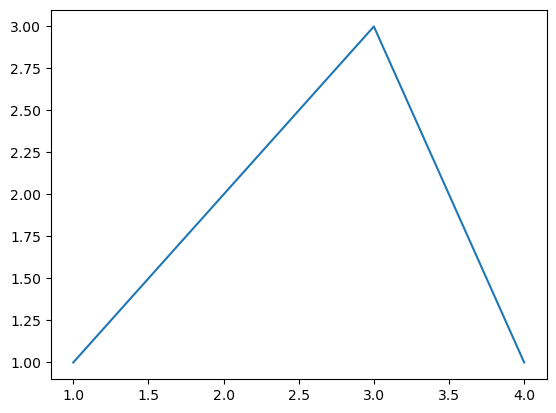

In [4]:
plt.style.use('default')
plt.plot([1, 2, 3, 4], [1, 2, 3, 1])

`matploblib.rcParams`是当前全局样式的字典，能管理所有样式。在之前设置中文字体的时候也用到了它。

参考：
+ https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html?highlight=axes.formatter.limits#matplotlib-rcparams
+ https://matplotlib.org/3.2.1/api/matplotlib_configuration_api.html#matplotlib.RcParams

通过`mpl.rcParams.keys()`查看所有的设定。

其键值名称经过编组，很容易进行浏览，找到自己想设置的样式名。

In [5]:
# 显示前20条，一共有300多条
list(mpl.rcParams.keys())[:20]

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.embed_limit',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.html_args',
 'animation.writer',
 'axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits']

然后按照`dict`的操作方法进行赋值即可改变样式，在新建绘图中生效。

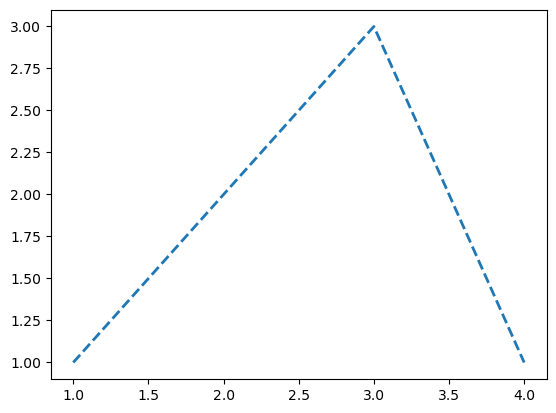

In [6]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1, 2, 3, 4], [1, 2, 3, 1])

## 色彩管理

主要回顾在matplotlib中设置颜色的方法。

### RGB和RGBA

通过一个\[0, 1\]之间的浮点数组成的元组表示。

四个分量按顺序分别为(red, green, blue, alpha)，其中alpha透明度可省略。

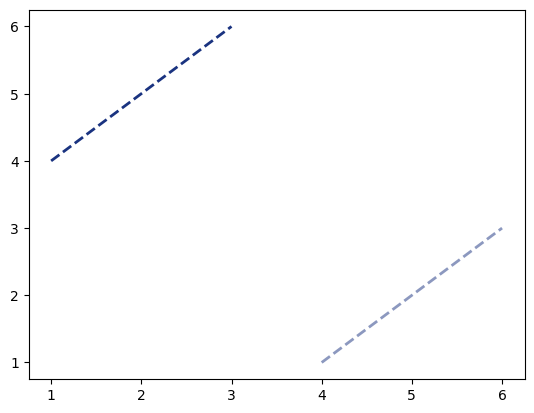

In [7]:
plt.plot([1,2,3], [4,5,6], color=(0.1, 0.2, 0.5))
plt.plot([4,5,6], [1,2,3], color=(0.1, 0.2, 0.5, 0.5))

### 16进制颜色表示

大多数人都不能做到快速理解16进制表示的颜色，这种设置通常是查表得来的。

因为它是固定格式的单个字符串，兼容性好，复制粘贴方便且不容易出错。

推荐一个我经常使用的网站，用来查找16进制颜色的表示
+ https://www.sioe.cn/yingyong/yanse-rgb-16/

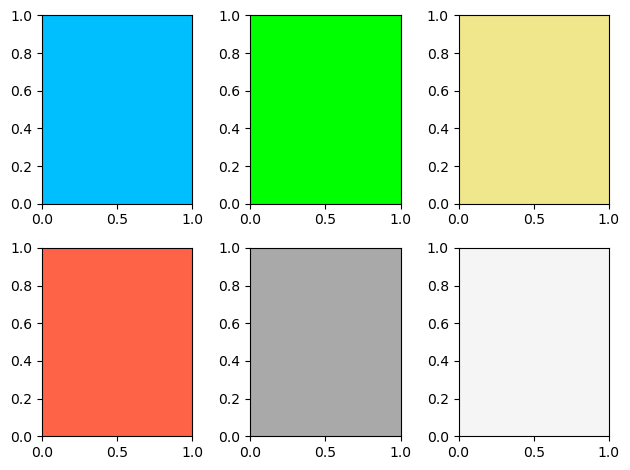

In [8]:
hex = ['#00BFFF', '#00FF00', '#F0E68C', '#FF6347', '#A9A9A9', '#F5F5F5']

fig, axes = plt.subplots(2, 3)
for i, ax in enumerate(axes.reshape(-1)):
    ax.set_facecolor(hex[i])

fig.tight_layout()

### 灰度表示

可以使用单个\[0, 1\]的浮点数表示灰阶。

即`color='0.5'`等价于`color=(0.5, 0.5, 0.5)`

注意，灰阶参数必须用`str`型，`float`型会报错。

<AxesSubplot:>

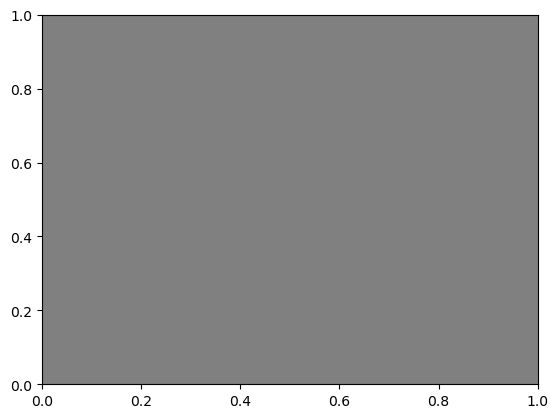

In [9]:
plt.subplot(facecolor='0.5')

### 基本颜色对应字符串表示

最后一种方式是使用`str`型来表示一个基本颜色。

这是一种查表操作，因此你需要熟悉颜色对应的英文名称。

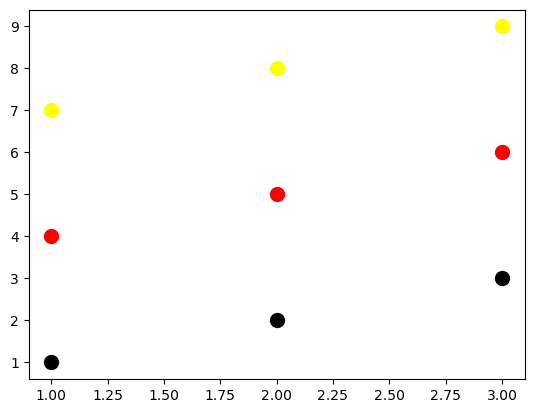

In [10]:
plt.scatter([1,2,3], [1,2,3], color='black', s=100)
plt.scatter([1,2,3], [4,5,6], color='red', s=100)
plt.scatter([1,2,3], [7,8,9], color='yellow', s=100)

## Colormap

有些图表支持使用colormap的方式配置一组颜色，从而在可视化中通过色彩的变化表达更多信息。

在matplotlib中，colormap共有五种类型:

- 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息
- 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇；当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
- 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
- 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
- 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。

下面这些是内置的Colormap。

In [11]:
# 内置的Colormap

builtin_cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

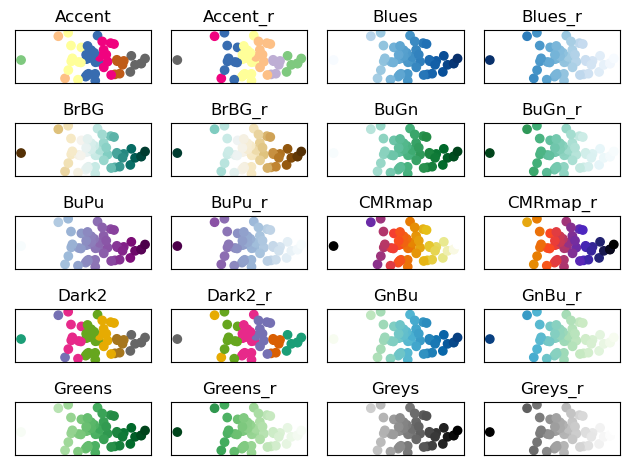

In [12]:
x = np.random.randn(50)
y = np.random.randn(50)

fig, axes = plt.subplots(5, 4)
for i, ax in enumerate(axes.reshape(-1)):
    ax.set_title(builtin_cmaps[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(x, y, c=x, cmap=builtin_cmaps[i])
fig.tight_layout()

下面这些仅供了解。

### 在数据集上使用Colormap

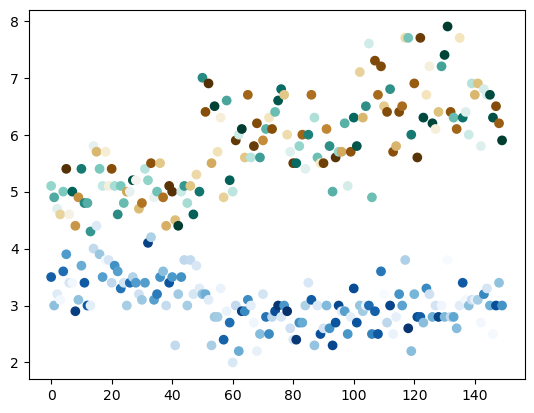

In [13]:
from sklearn.datasets import load_iris

data = load_iris().data

plt.scatter(range(150), data[:, 0], c=np.random.uniform(0, 1, 150), cmap=builtin_cmaps[4])
plt.scatter(range(150), data[:, 1], c=np.random.uniform(0, 1, 150), cmap=builtin_cmaps[2])

### 自定义Colormap

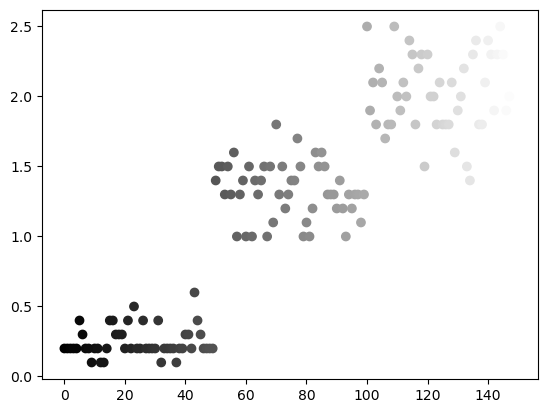

In [14]:
from matplotlib.colors import ListedColormap

colors = np.linspace(0, 1, 100)
colors = np.c_[colors, colors, colors]

cmp = ListedColormap(colors=colors)

plt.scatter(range(150), data[:, 3], c=np.linspace(0, 1, 150), cmap=cmp)